In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
from sklearn.datasets import load_boston

In [6]:
boston=load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [7]:
x=boston.data
y=boston.target

In [10]:
x=pd.DataFrame(x,columns=boston.feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Data Visualization 

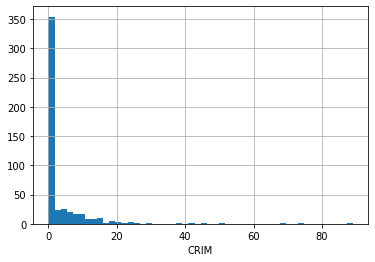

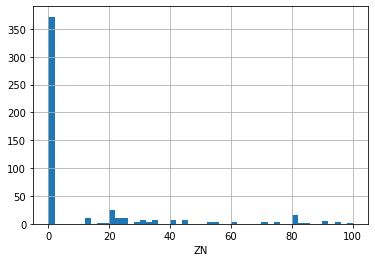

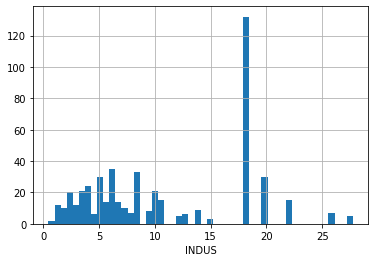

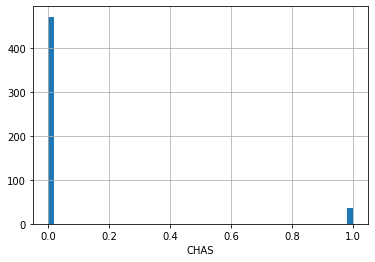

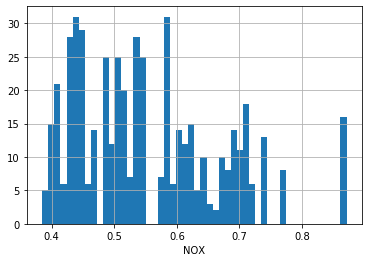

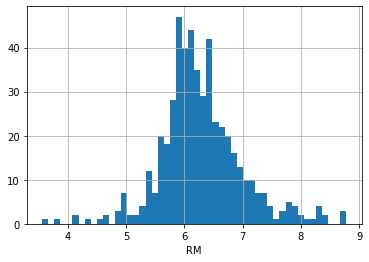

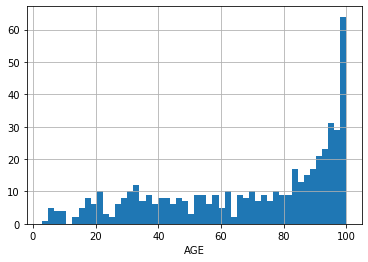

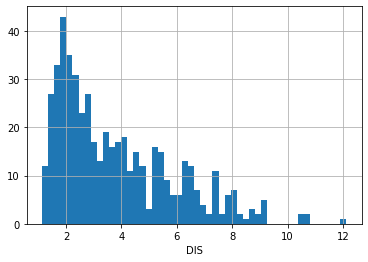

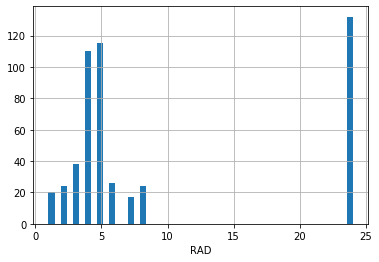

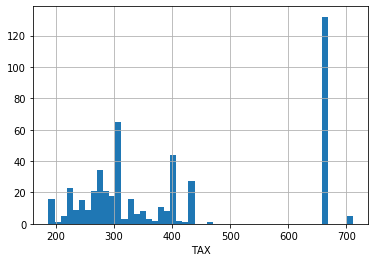

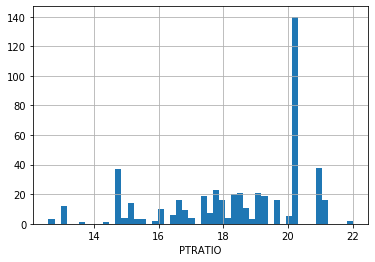

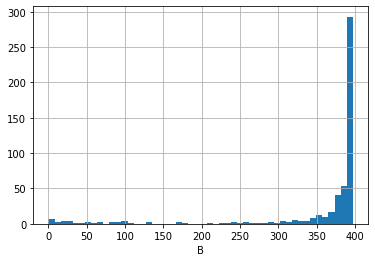

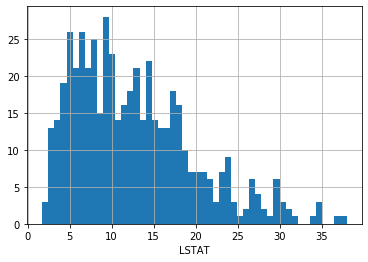

In [12]:
for columns in x:
    x[columns].hist(bins=50)
    plt.xlabel(columns)
    plt.show()

### Feature Engineering

### 1.check for Null values

In [14]:
features_null= [columns for columns in x if x[columns].isnull().sum()>0]
features_null
    
    

[]

### we are not having any null values in our dataset

### Since Random Forest is not sensitive to outliers we are not checking and treating any outliers

### Feature Engineering 

### 1.Correlation matrix 

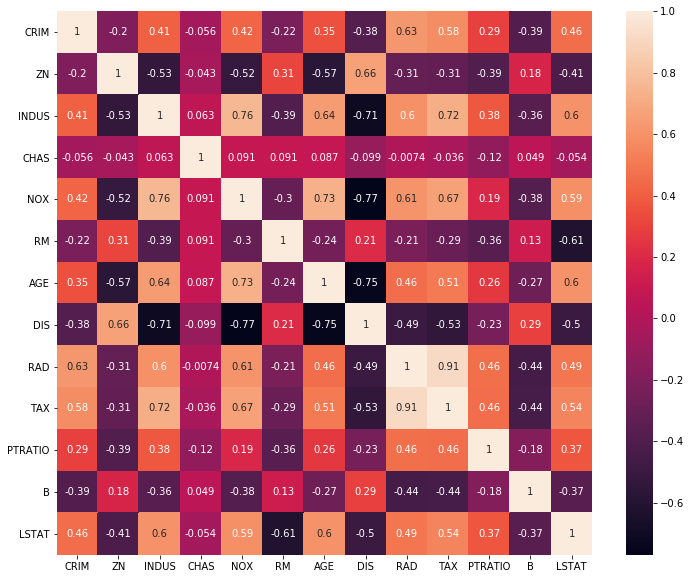

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(x.corr(),annot=True)

In [21]:
def remove_high_correleated_features(df,threshold):
    result=[]
    corr_matrix=df.corr()
    
    for i in range(len(corr_matrix)):
        for j in range(i):
            if corr_matrix.iloc[i,j]>=threshold:
                feature=df.columns[i]
                result.append(feature)
    return result

In [26]:
remove_high_correleated_features(x,0.9)

['TAX']

### Tax is the  highly correlated with the Rad feature in this dataset

### 2. Information Gain

In [27]:
from sklearn.feature_selection import mutual_info_regression
reg=mutual_info_regression(x,y)

In [29]:
features=pd.Series(reg,index=x.columns)
features.sort_values(ascending=False)

LSTAT      0.667621
RM         0.530520
INDUS      0.467459
NOX        0.461951
PTRATIO    0.445193
TAX        0.355186
CRIM       0.349587
AGE        0.313592
DIS        0.298615
RAD        0.213570
ZN         0.179508
B          0.159330
CHAS       0.025720
dtype: float64

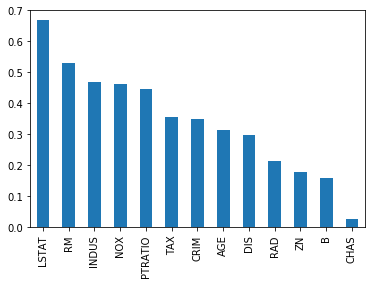

In [30]:
features.sort_values(ascending=False).plot(kind='bar')

In [31]:
from sklearn.feature_selection import SelectPercentile

In [32]:
top_columns=SelectPercentile(mutual_info_regression,percentile=80)
top=top_columns.fit(x,y)

In [34]:
features=x.columns[top.get_support()]

In [35]:
features

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
       'LSTAT'],
      dtype='object')

In [36]:
columns=['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO',
       'LSTAT']

In [37]:
df=x.copy()

In [38]:
df=df[columns]

In [39]:
df.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,2.94
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,5.33


In [40]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [41]:
x_scaled=scalar.fit_transform(df)
x_scaled

array([[-0.41978194, -1.2879095 , -0.14421743, ..., -0.66660821,
        -1.45900038, -1.0755623 ],
       [-0.41733926, -0.59338101, -0.74026221, ..., -0.98732948,
        -0.30309415, -0.49243937],
       [-0.41734159, -0.59338101, -0.74026221, ..., -0.98732948,
        -0.30309415, -1.2087274 ],
       ...,
       [-0.41344658,  0.11573841,  0.15812412, ..., -0.80321172,
         1.17646583, -0.98304761],
       [-0.40776407,  0.11573841,  0.15812412, ..., -0.80321172,
         1.17646583, -0.86530163],
       [-0.41500016,  0.11573841,  0.15812412, ..., -0.80321172,
         1.17646583, -0.66905833]])

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=100)

In [44]:
x_train.shape

(404, 9)

In [45]:
x_test.shape

(102, 9)

In [46]:
y_train.shape

(404,)

In [47]:
y_test.shape

(102,)

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=100)

In [49]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=100)

In [50]:
rf.score(x_test,y_test)

0.8879837186143181

In [ ]:
n_estimators=100,
    *,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)

### Performing Gridsearchcv to obtain a stable model

In [51]:
from sklearn.model_selection import GridSearchCV

In [62]:
grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['mse'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

In [63]:
grid=GridSearchCV(estimator=rf,param_grid=grid_param,n_jobs=-1,cv=2,verbose=3)

In [64]:
grid.fit(x_train,y_train)

Fitting 2 folds for each of 150 candidates, totalling 300 fits


GridSearchCV(cv=2,
             estimator=RandomForestRegressor(max_features='log2',
                                             min_samples_leaf=4),
             n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 5, 6, 7, 8],
                         'n_estimators': [90, 100, 115]},
             verbose=3)

In [65]:
grid.best_params_

{'criterion': 'mse',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 115}

In [66]:
rf=RandomForestRegressor(criterion='mse',max_features='log2',min_samples_leaf=1,min_samples_split=4)

In [67]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_features='log2', min_samples_split=4)

In [68]:
rf.score(x_test,y_test)

0.8946900097917904

In [74]:
pred=rf.predict(x_test)

In [78]:
result=pd.DataFrame(y_test)

In [80]:
result['prediction']=list(pred)

In [83]:
result.columns=['Actual','Prediction']
result

,Actual,Prediction
0,34.6,32.924278
1,31.5,30.261742
2,20.6,18.667344
3,14.5,19.409152
4,16.2,20.043178
...,...,...
97,50.0,47.908445
98,7.2,11.030335
99,50.0,38.374367
100,14.0,15.518751


In [84]:
#for visualization purpose we are using pca to decompising all the in df to a single column and 
#concatinating with the result dataframe

In [89]:
from sklearn.decomposition import PCA

In [90]:
pca = PCA(n_components=1)
x_value = pca.fit_transform(x_test)

In [91]:
result['x_data']=x_value
result.head()

,Actual,Prediction,x_data
0,34.6,32.924278,-3.654955
1,31.5,30.261742,-1.987864
2,20.6,18.667344,0.101579
3,14.5,19.409152,0.033153
4,16.2,20.043178,-0.400897


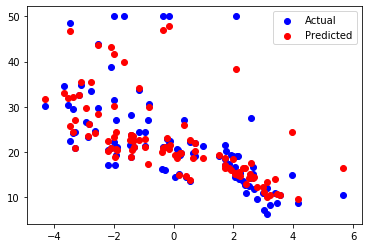

In [93]:
plt.scatter(x='x_data',y='Actual',data=result,color='blue',label='Actual')
plt.scatter(x='x_data',y='Prediction',data=result,color='red',label='Predicted')
plt.legend()